In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns

In [2]:
df = pd.read_csv("data\sample.csv")

c:\Users\FI40WR\Anaconda3\envs\model_fairness\lib\site-packages\IPython\core\interactiveshell.py:3524: DtypeWarning: Columns (35,37,39,45,47,49) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df["TARGET"] = np.where(df["action_taken"].isin([1, 2]), "approved", "rejected")

In [4]:
states = {
    "AK": "O",
    "AL": "S",
    "AR": "S",
    "AS": "O",
    "AZ": "W",
    "CA": "W",
    "CO": "W",
    "CT": "N",
    "DC": "N",
    "DE": "N",
    "FL": "S",
    "GA": "S",
    "GU": "O",
    "HI": "O",
    "IA": "M",
    "ID": "W",
    "IL": "M",
    "IN": "M",
    "KS": "M",
    "KY": "S",
    "LA": "S",
    "MA": "N",
    "MD": "N",
    "ME": "N",
    "MI": "W",
    "MN": "M",
    "MO": "M",
    "MP": "O",
    "MS": "S",
    "MT": "W",
    "NA": "O",
    "NC": "S",
    "ND": "M",
    "NE": "W",
    "NH": "N",
    "NJ": "N",
    "NM": "W",
    "NV": "W",
    "NY": "N",
    "OH": "M",
    "OK": "S",
    "OR": "W",
    "PA": "N",
    "PR": "O",
    "RI": "N",
    "SC": "S",
    "SD": "M",
    "TN": "S",
    "TX": "S",
    "UT": "W",
    "VA": "S",
    "VI": "O",
    "VT": "N",
    "WA": "W",
    "WI": "M",
    "WV": "S",
    "WY": "W",
}
df["region"] = df["state_abbr"]
df["region"].replace(states, inplace=True)

In [5]:
tbl = (
    pd.crosstab(df["state_abbr"], df["TARGET"])
    .sort_values("approved", ascending=False)
    .reset_index()
)

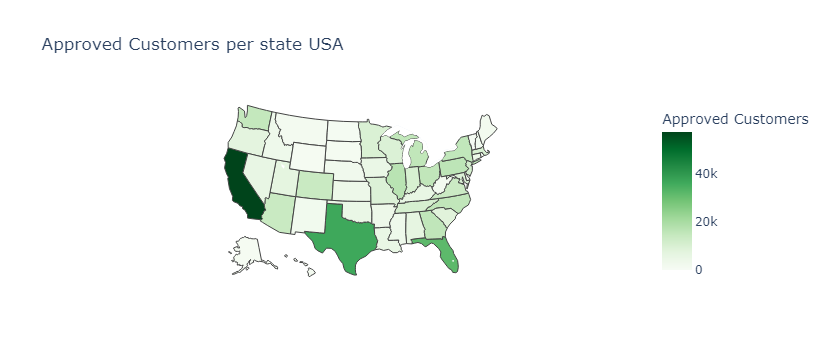

In [6]:
fig = go.Figure(
    data=go.Choropleth(
        locations=tbl["state_abbr"],  # Spatial coordinates
        z=tbl["approved"].astype(float),  # Data to be color-coded
        locationmode="USA-states",  # set of locations match entries in `locations`
        colorscale="Greens",
        colorbar_title="Approved Customers",
    )
)

fig.update_layout(
    title_text="Approved Customers per state USA",
    geo_scope="usa",  # limite map scope to USA
)

fig.show()

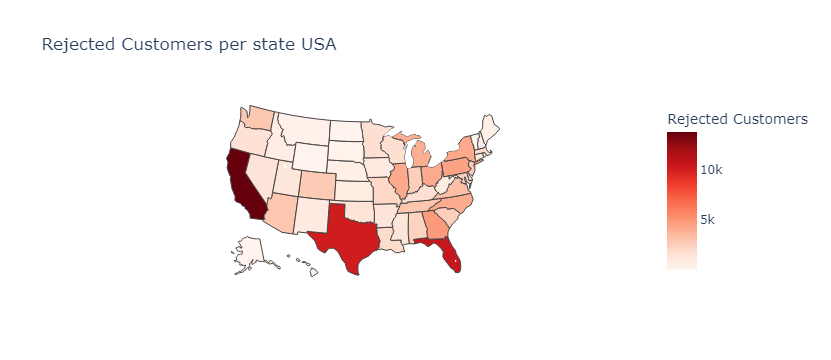

In [7]:
fig = go.Figure(
    data=go.Choropleth(
        locations=tbl["state_abbr"],  # Spatial coordinates
        z=tbl["rejected"].astype(float),  # Data to be color-coded
        locationmode="USA-states",  # set of locations match entries in `locations`
        colorscale="Reds",
        colorbar_title="Rejected Customers",
    )
)

fig.update_layout(
    title_text="Rejected Customers per state USA",
    geo_scope="usa",  # limite map scope to USA
)

fig.show()

In [8]:
categorical_variables = [
    "region",
    "loan_type_name",
    "property_type_name",
    "loan_purpose_name",
    "owner_occupancy_name",
    "applicant_ethnicity_name",
    "applicant_race_name_1",
    "applicant_sex_name",
    "TARGET",
]
numerical_variables = ["loan_amount_000s", "applicant_income_000s"]

In [9]:
for col in df[categorical_variables]:
    if col != "TARGET":
        print(col)
        print(df[col].unique())
        print("---------------------------")

region
['W' 'N' 'S' 'M' 'O' nan]
---------------------------
loan_type_name
['Conventional' 'FHA-insured' 'VA-guaranteed' 'FSA/RHS-guaranteed']
---------------------------
property_type_name
['One-to-four family dwelling (other than manufactured housing)'
 'Manufactured housing' 'Multifamily dwelling']
---------------------------
loan_purpose_name
['Home purchase' 'Refinancing' 'Home improvement']
---------------------------
owner_occupancy_name
['Owner-occupied as a principal dwelling'
 'Not owner-occupied as a principal dwelling' 'Not applicable']
---------------------------
applicant_ethnicity_name
['Not Hispanic or Latino'
 'Information not provided by applicant in mail, Internet, or telephone application'
 'Hispanic or Latino' 'Not applicable']
---------------------------
applicant_race_name_1
['White' 'Black or African American' 'Asian'
 'Information not provided by applicant in mail, Internet, or telephone application'
 'American Indian or Alaska Native' 'Not applicable'
 'Nativ

In [10]:
property_type_name = {
    "One-to-four family dwelling (other than manufactured housing)": "One-to-four family dwelling",
}
df["property_type_name"].replace(property_type_name, inplace=True)


owner_occupancy_name = {
    "Owner-occupied as a principal dwelling": "Owner-occupied",
    "Not owner-occupied as a principal dwelling": "Not owner-occupied",
    "Not applicable": "Not applicable",
}
df["owner_occupancy_name"].replace(owner_occupancy_name, inplace=True)


applicant_ethnicity_name = {
    "Information not provided by applicant in mail, Internet, or telephone application": "Information not provided",
}
df["applicant_ethnicity_name"].replace(applicant_ethnicity_name, inplace=True)

applicant_race_name_1 = {
    "Information not provided by applicant in mail, Internet, or telephone application": "Information not provided",
}
df["applicant_race_name_1"].replace(applicant_race_name_1, inplace=True)

applicant_sex_name = {
    "Information not provided by applicant in mail, Internet, or telephone application": "Information not provided",
}
df["applicant_sex_name"].replace(applicant_sex_name, inplace=True)

In [11]:
pd.crosstab(df["applicant_sex_name"], df["TARGET"]).sort_values(
    "approved", ascending=False
).reset_index()

TARGET,applicant_sex_name,approved,rejected
0,Male,301875,70550
1,Female,135207,39584
2,Information not provided,30830,12506
3,Not applicable,8956,492


region with respect to Approval
TARGET  approved  rejected
region                    
S         165104     49326
W         147616     33166
M          83082     18474
N          76128     19542
O           3824      1349


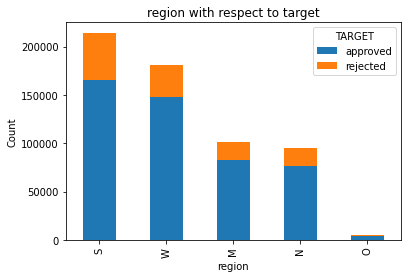

loan_type_name with respect to Approval
TARGET              approved  rejected
loan_type_name                        
Conventional          351201     91434
FHA-insured            74987     19688
VA-guaranteed          42832     10596
FSA/RHS-guaranteed      7848      1414


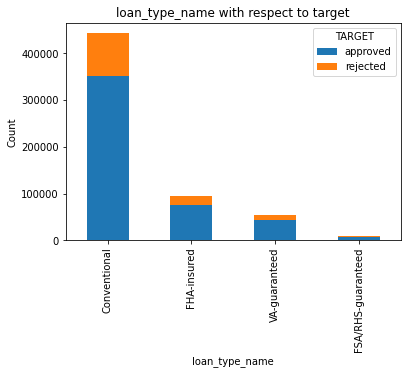

property_type_name with respect to Approval
TARGET                       approved  rejected
property_type_name                             
One-to-four family dwelling    463506    109596
Manufactured housing            10898     13308
Multifamily dwelling             2464       228


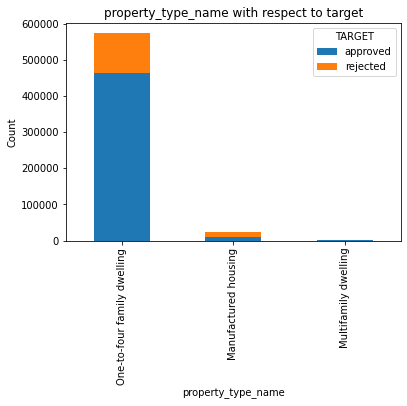

loan_purpose_name with respect to Approval
TARGET             approved  rejected
loan_purpose_name                    
Home purchase        273048     42678
Refinancing          167744     58978
Home improvement      36076     21476


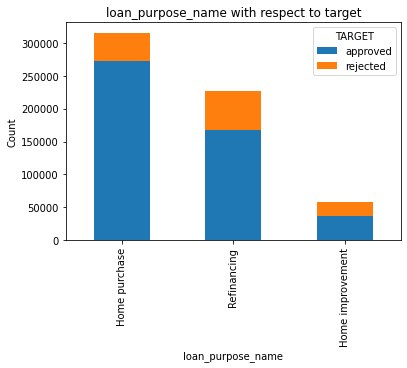

owner_occupancy_name with respect to Approval
TARGET                approved  rejected
owner_occupancy_name                    
Owner-occupied          424452    111724
Not owner-occupied       49960     11089
Not applicable            2456       319


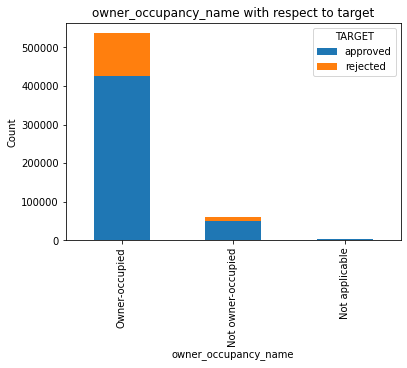

applicant_ethnicity_name with respect to Approval
TARGET                    approved  rejected
applicant_ethnicity_name                    
Not Hispanic or Latino      372614     87220
Information not provided     48788     19707
Hispanic or Latino           46315     15665
Not applicable                9151       540


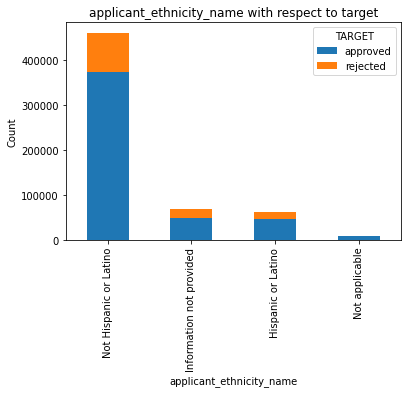

applicant_race_name_1 with respect to Approval
TARGET                                     approved  rejected
applicant_race_name_1                                        
White                                        354771     79195
Information not provided                      52040     20419
Black or African American                     29941     15306
Asian                                         25888      5289
Not applicable                                 8979       494
American Indian or Alaska Native               3223      1748
Native Hawaiian or Other Pacific Islander      2026       681


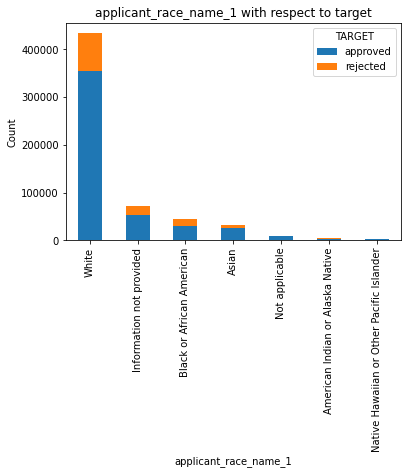

applicant_sex_name with respect to Approval
TARGET                    approved  rejected
applicant_sex_name                          
Male                        301875     70550
Female                      135207     39584
Information not provided     30830     12506
Not applicable                8956       492


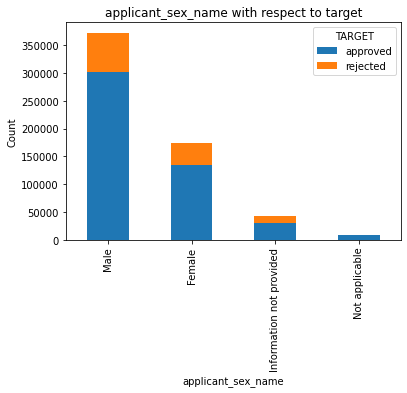

In [12]:
for feature in df[categorical_variables]:
    if feature != "TARGET":
        tbl = pd.crosstab(df[feature], df["TARGET"]).sort_values(
            "approved", ascending=False
        )
        print(f"{feature} with respect to Approval")
        print(tbl)
        tbl.plot(kind="bar", stacked=True)
        plt.title(f"{feature} with respect to target")
        plt.ylabel("Count")
        plt.show()

<AxesSubplot:xlabel='variable', ylabel='value'>

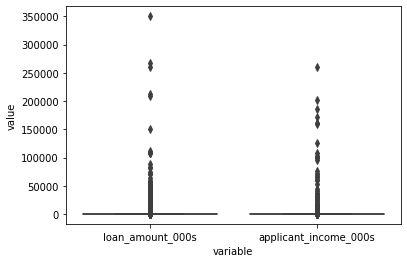

In [13]:
df_2 = pd.DataFrame(data=df, columns=numerical_variables)
sns.boxplot(x="variable", y="value", data=pd.melt(df_2))

Text(0.5, 1.0, 'Number of approved and rejected customers')

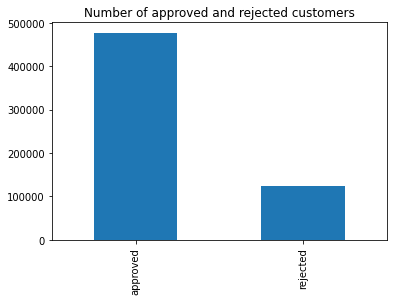

In [18]:
df["TARGET"].value_counts().plot(kind="bar", stacked=True)
plt.title("Number of approved and rejected customers")